<a href="https://colab.research.google.com/github/TomasManuelObregon/Python/blob/Labo2/clase5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib._api import kwarg_error
# Importo las librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as op

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

err_dist = 1 # cm 

frec = [370.0, 627.4] # Hz
err_frec = [3.5, 0.7]

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

def Ajuste(x, A, k, phi, c): return abs(A * np.cos( k*x + phi)) + c

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

def todo(datos, i, frecuencia, err_frecuencia):
  # Importo datos
  data = np.loadtxt(datos, skiprows=1, delimiter=';')

  distancia    = np.array(data[:,0] + 0.678)
  amplitud     = np.array(data[:,1])
  err_amplitud = np.array(data[:,2]) 

  # - - - - - - - - - - - - - - - - - - -
  # Hago el ajuste

  popt, pcov = op.curve_fit(Ajuste, distancia, amplitud, p0=[5000, (2*np.pi)/93, 0, min(amplitud)], sigma=err_amplitud, absolute_sigma = True)
  A_ajuste      = popt[0]
  k_ajuste      = popt[1]
  phi_ajuste    = popt[2]
  c_ajuste      = popt[3]
  err_k_ajuste  = pcov[1][1]

  dom = np.linspace(min(distancia), max(distancia), 1000)
  im  = Ajuste(dom, A_ajuste, k_ajuste, phi_ajuste, c_ajuste)

  # - - - - - - - - - - - - - - - - - - -
  # Calculo lambda

  lambda_calculada     = (2 * np.pi)/k_ajuste
  err_lambda_calculada = ((2 * np.pi)/(k_ajuste**2)) * err_k_ajuste

  print(f'Longitud de onda calculada: {np.round(lambda_calculada, decimals=7)} ± {np.round(err_lambda_calculada, decimals=7)}')

  # - - - - - - - - - - - - - - - - - - -
  # Grafico

  plt.figure(figsize=[8,4])

  plt.scatter(distancia, amplitud, c='black', marker='o', label='Datos')
  plt.errorbar(distancia, amplitud, xerr=err_dist ,yerr= err_amplitud, linewidth= 0, elinewidth= 2, capsize = 3, c='red', label= 'Error')
  plt.plot(dom, im, c='orange', label='Ajuste')

  plt.title(f'Modo {i} - Frecuencia: ({frecuencia} ± {err_frecuencia}) Hz', fontsize=20)
  plt.xlabel("Distancia [cm]", fontsize=15)
  plt.ylabel("Amplitud recibida [mVpp]", fontsize=15)
  plt.legend(fontsize='15')
  plt.grid()
  plt.show()

  # - - - - - - - - - - - - - - - - - - -
  # Chi cuadrado
  dom_ajuste = np.linspace(min(distancia), max(distancia), len(distancia))
  im_ajuste  = np.array(Ajuste(dom_ajuste, A_ajuste, k_ajuste, phi_ajuste, c_ajuste))

  def chi_sqr(medicion, imagen, error): return np.sum(((medicion-im_ajuste)/error)**2)    
  print(chi_sqr(amplitud, im_ajuste, err_amplitud))

Longitud de onda calculada: 95.0631014 ± 2.3e-06


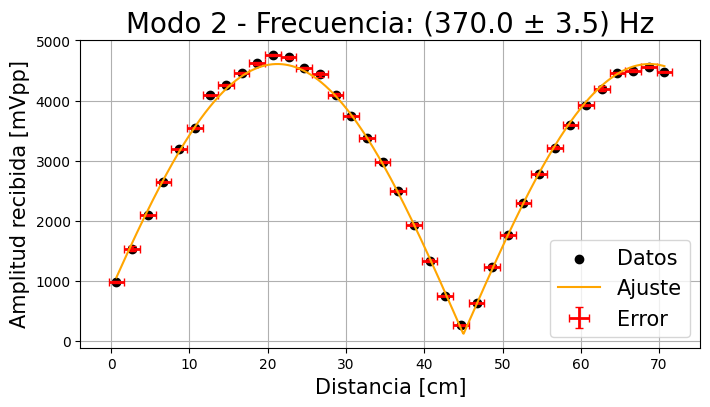

908.1245935868436
Longitud de onda calculada: 55.8340622 ± 9e-07


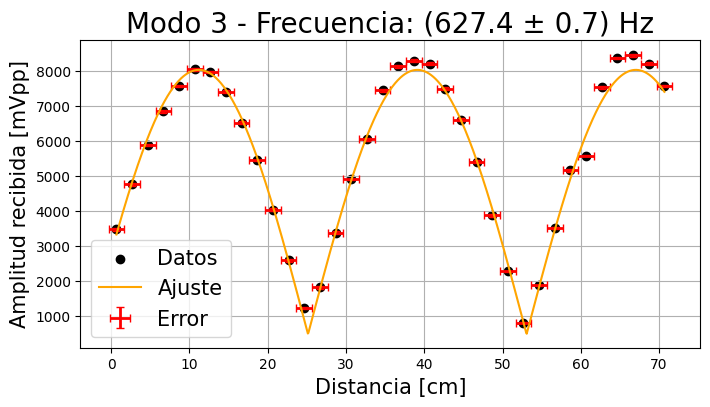

2302.595534054665


In [ ]:
todo('modo2.csv', 2, frec[0], err_frec[0])
todo('modo3.csv', 3, frec[1], err_frec[1])